In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import colors
from matplotlib.ticker import PercentFormatter

df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')

df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0                            374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [3]:
df.describe()

,,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,5.350802,5.328877,4.874332,7.192513,70.165775,6816.844920
std,108.108742,8.673133,1.041775,1.433558,1.246006,1.555186,4.135676,1617.915679
min,1.000000,27.000000,3.200000,2.000000,2.000000,2.000000,65.000000,3000.000000
25%,94.250000,35.250000,4.500000,5.000000,4.000000,6.000000,68.000000,5600.000000
50%,187.500000,43.000000,5.500000,5.000000,5.000000,8.000000,70.000000,7000.000000
75%,280.750000,50.000000,6.075000,6.000000,6.000000,8.000000,72.000000,8000.000000
max,374.000000,59.000000,7.700000,8.000000,8.000000,10.000000,86.000000,10000.000000


In [4]:
df.head()

,,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,5,3,6,Overweight,126/83,77,4200,Nothing
1,2,Male,28,Doctor,5.5,5,5,9,Normal,125/80,75,10000,Nothing
2,3,Male,28,Doctor,5.3,4,5,9,Normal,125/80,75,10000,Nothing
3,4,Male,28,Sales Representative,4.2,3,2,7,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,4.4,3,2,6,Obese,140/90,85,3000,Sleep Apnea


In [5]:
# percentiles = df['Sleep Duration'].quantile([0.25, 0.50, 0.75])
 
# print(f"25th percentile: {percentiles[0.25]}")
# print(f"50th percentile (median): {percentiles[0.50]}")
# print(f"75th percentile: {percentiles[0.75]}")

In [6]:
# percentiles = np.percentile(df['Age'], [25, 50, 75])

# print(f"25th percentile: {percentiles[0]}")
# print(f"50th percentile (median): {percentiles[1]}")
# print(f"75th percentile: {percentiles[2]}")

In [7]:
# percentiles = np.percentile(df['Quality of Sleep'], [25, 50, 75])
 
# print(f"25th percentile: {percentiles[0]}")
# print(f"50th percentile (median): {percentiles[1]}")
# print(f"75th percentile: {percentiles[2]}")

In [8]:
data = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')

data = data.drop(columns=data.columns[0])
data['Gender'] = data.iloc[:,0].map({'Male': 1, 'Female': 0})
data['BMI'] = data.iloc[:,7].map({'Normal': 1, 'Overweight': 2, 'Obese': 3})

describe = data.describe()

numeric_data = data.select_dtypes(include='number')

median_values = numeric_data.median()
mode_values = numeric_data.mode().iloc[0]

summary_stats = pd.DataFrame({
    'Mean': describe.loc['mean'],
    'Median': median_values,
    'Mode': mode_values
})

print(summary_stats)

                                Mean  Median    Mode
Gender                      0.665775     1.0     1.0
Age                        42.184492    43.0    43.0
Sleep Duration              5.350802     5.5     6.0
Quality of Sleep            5.328877     5.0     5.0
Physical Activity Level     4.874332     5.0     5.0
Stress Level                7.192513     8.0     8.0
Heart Rate                 70.165775    70.0    68.0
Daily Steps              6816.844920  7000.0  8000.0
BMI                         1.179144     1.0     1.0


In [9]:
varAge = df['Age'].var()
varSleepDuration = df['Sleep Duration'].var()
varSleepQuality = df['Quality of Sleep'].var()

print("Variance")
print(f"Sleep Duration: {varSleepDuration}")
print(f"Quality of Sleep: {varSleepQuality}")
print(f"Physical Activity Level: {df['Physical Activity Level'].var()}")
print(f"Stress Level: {df['Stress Level'].var()}")

Variance
Sleep Duration: 1.0852942610141791
Quality of Sleep: 2.0550888159309544
Physical Activity Level: 1.552529712835658
Stress Level: 2.41860331751516


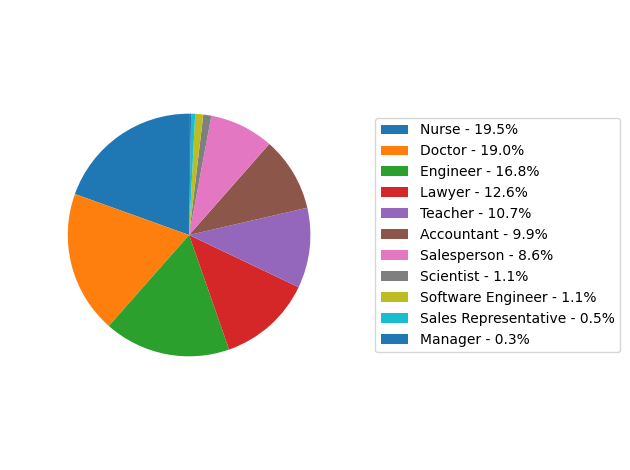

In [10]:
occupation_counts = data['Occupation'].value_counts()

labels = occupation_counts.index  
sizes = occupation_counts.values  

total = sum(sizes)
percentages = [(size / total) * 100 for size in sizes]
labels_with_percentages = [f'{label} - {size:.1f}%' for label, size in zip(labels, percentages)]

fig, ax = plt.subplots()

ax.pie(sizes, startangle=90)

ax.legend(labels_with_percentages, loc="center left", bbox_to_anchor=(1, 0.5), fontsize=10)

ax.axis('equal')  

plt.tight_layout()
plt.show()

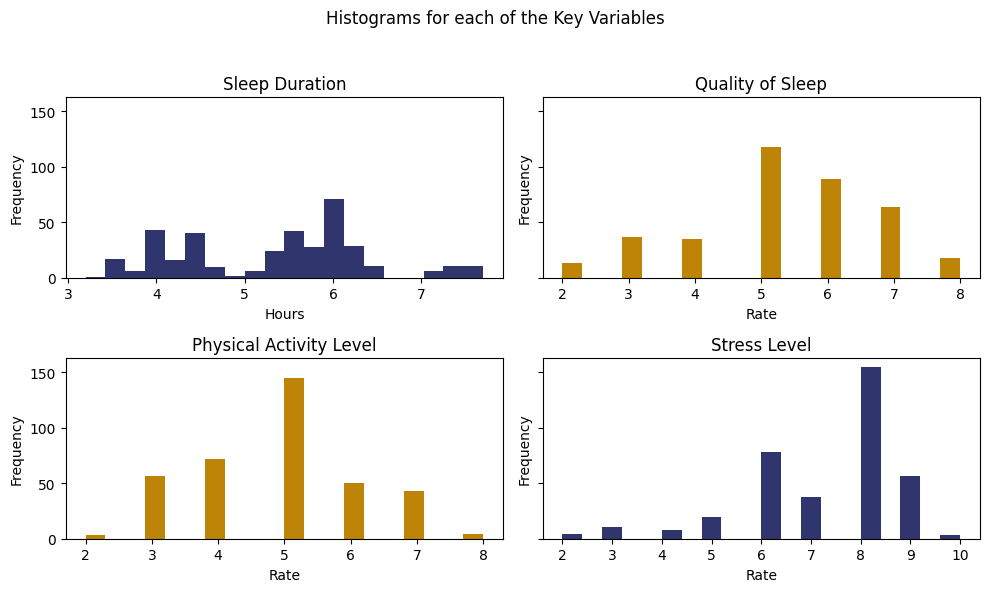

In [11]:
variables = ['Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level']

n_bins = 20

fig, axs = plt.subplots(2, 2, sharey=True, figsize=(10, 6))
fig.suptitle('Histograms for each of the Key Variables')

axs[0, 0].hist(data['Sleep Duration'], bins=n_bins, color='#31356e')
axs[0, 0].set_title('Sleep Duration')
axs[0, 0].set_xlabel('Hours') 
axs[0, 0].set_ylabel('Frequency')

axs[0, 1].hist(data['Quality of Sleep'], bins=n_bins, color='#bd8407')
axs[0, 1].set_title('Quality of Sleep')
axs[0, 1].set_xlabel('Rate')  
axs[0, 1].set_ylabel('Frequency')

axs[1, 0].hist(data['Physical Activity Level'], bins=n_bins, color='#bd8407')
axs[1, 0].set_title('Physical Activity Level')
axs[1, 0].set_xlabel('Rate') 
axs[1, 0].set_ylabel('Frequency')

axs[1, 1].hist(data['Stress Level'], bins=n_bins, color='#31356e')
axs[1, 1].set_title('Stress Level')
axs[1, 1].set_xlabel('Rate')
axs[1, 1].set_ylabel('Frequency')

plt.tight_layout(rect=[0, 0, 1, 0.95])  

plt.show()

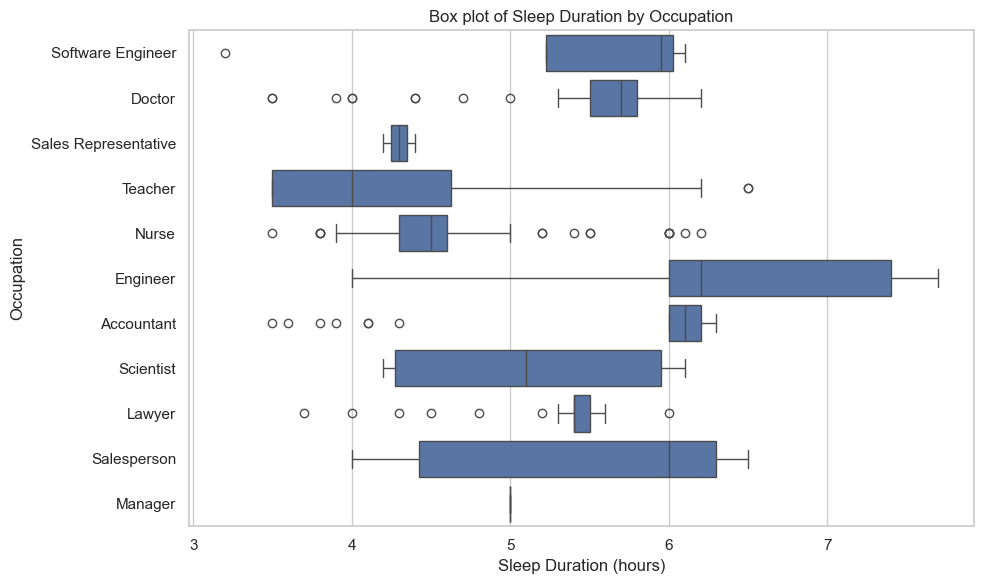

In [12]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Create a box plot for the Iris dataset
plt.figure(figsize=(10, 6))
sns.boxplot(y="Occupation", x="Sleep Duration", data=data)

# Add labels and title
plt.title("Box plot of Sleep Duration by Occupation")
plt.ylabel("Occupation")
plt.xlabel("Sleep Duration (hours)")

# Show the plot
plt.tight_layout()
plt.show()

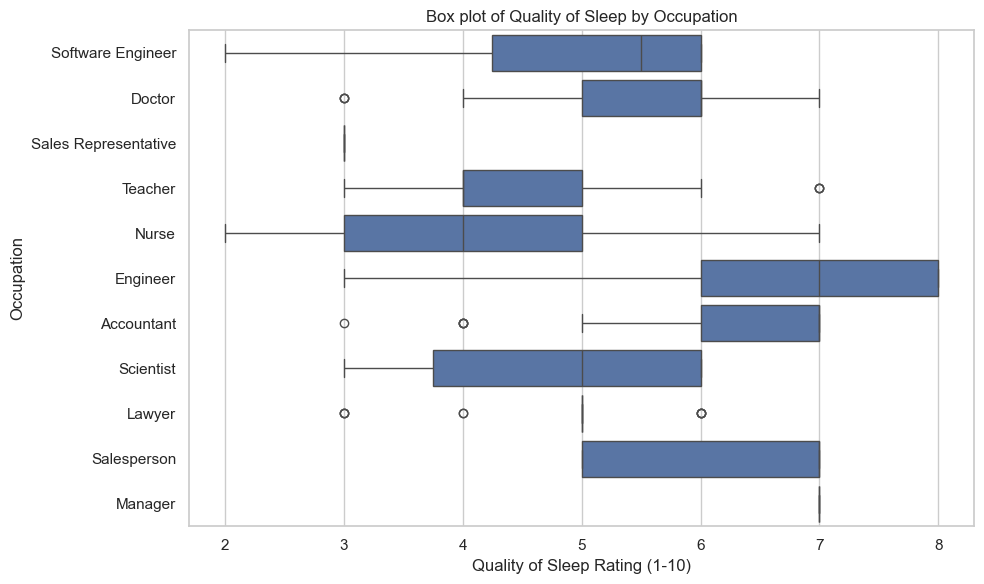

In [13]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Create a box plot for the Iris dataset
plt.figure(figsize=(10, 6))
sns.boxplot(y="Occupation", x="Quality of Sleep", data=data)

# Add labels and title
plt.title("Box plot of Quality of Sleep by Occupation")
plt.ylabel("Occupation")
plt.xlabel("Quality of Sleep Rating (1-10)")

# Show the plot
plt.tight_layout()
plt.show()

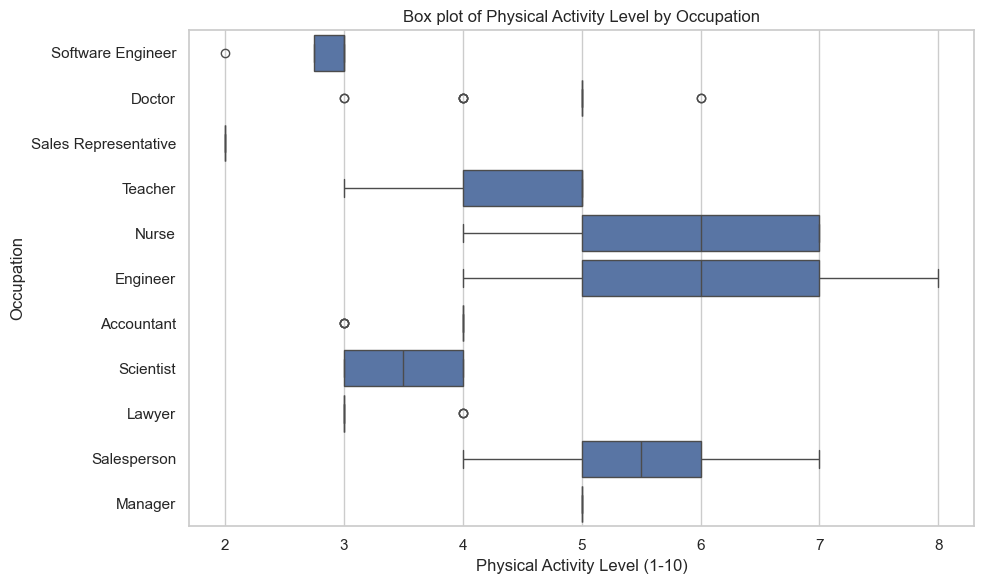

In [14]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Create a box plot for the Iris dataset
plt.figure(figsize=(10, 6))
sns.boxplot(y="Occupation", x="Physical Activity Level", data=data)

# Add labels and title
plt.title("Box plot of Physical Activity Level by Occupation")
plt.ylabel("Occupation")
plt.xlabel("Physical Activity Level (1-10)")

# Show the plot
plt.tight_layout()
plt.show()

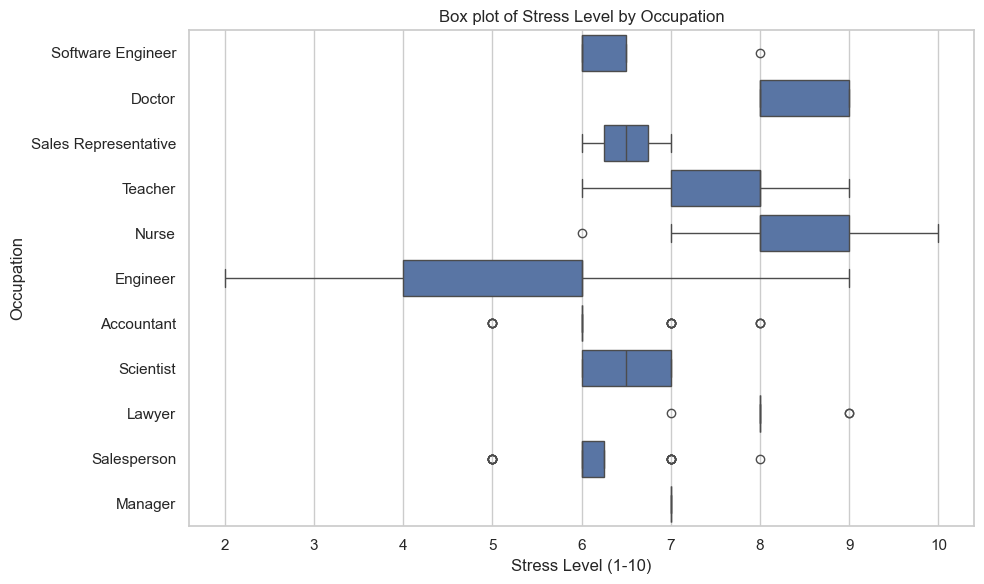

In [15]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Create a box plot for the Iris dataset
plt.figure(figsize=(10, 6))
sns.boxplot(y="Occupation", x="Stress Level", data=data)

# Add labels and title
plt.title("Box plot of Stress Level by Occupation")
plt.ylabel("Occupation")
plt.xlabel("Stress Level (1-10)")

# Show the plot
plt.tight_layout()
plt.show()

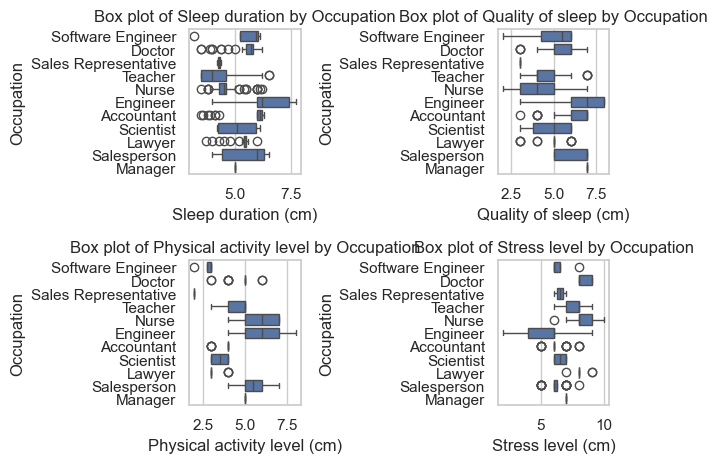

In [16]:
# Create a box plot for each feature by species
features = ['Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level']

for i, feature in enumerate(features):
    plt.subplot(2, 2, i+1)
    sns.boxplot(y="Occupation", x=feature, data=data)
    plt.title(f"Box plot of {feature.replace('_', ' ').capitalize()} by Occupation")
    plt.ylabel("Occupation")
    plt.xlabel(f"{feature.replace('_', ' ').capitalize()} (cm)")

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

In [17]:
percentiles = df[['Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level']].quantile([0.25, 0.50, 0.75])

print("Percentiles (25th, 50th, 75th) for Sleep Duration, Quality of Sleep, Physical Activity Level, and Stress Level:")
print(percentiles)

correlation_matrix = df[['Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level']].corr()

print("\nCorrelation Matrix:")
print(correlation_matrix)

Percentiles (25th, 50th, 75th) for Sleep Duration, Quality of Sleep, Physical Activity Level, and Stress Level:
      Sleep Duration  Quality of Sleep  Physical Activity Level  Stress Level
0.25           4.500               5.0                      4.0           6.0
0.50           5.500               5.0                      5.0           8.0
0.75           6.075               6.0                      6.0           8.0

Correlation Matrix:
                         Sleep Duration  Quality of Sleep  \
Sleep Duration                 1.000000          0.856561   
Quality of Sleep               0.856561          1.000000   
Physical Activity Level        0.171813          0.140271   
Stress Level                  -0.708995         -0.741571   

                         Physical Activity Level  Stress Level  
Sleep Duration                          0.171813     -0.708995  
Quality of Sleep                        0.140271     -0.741571  
Physical Activity Level                 1.000000     -

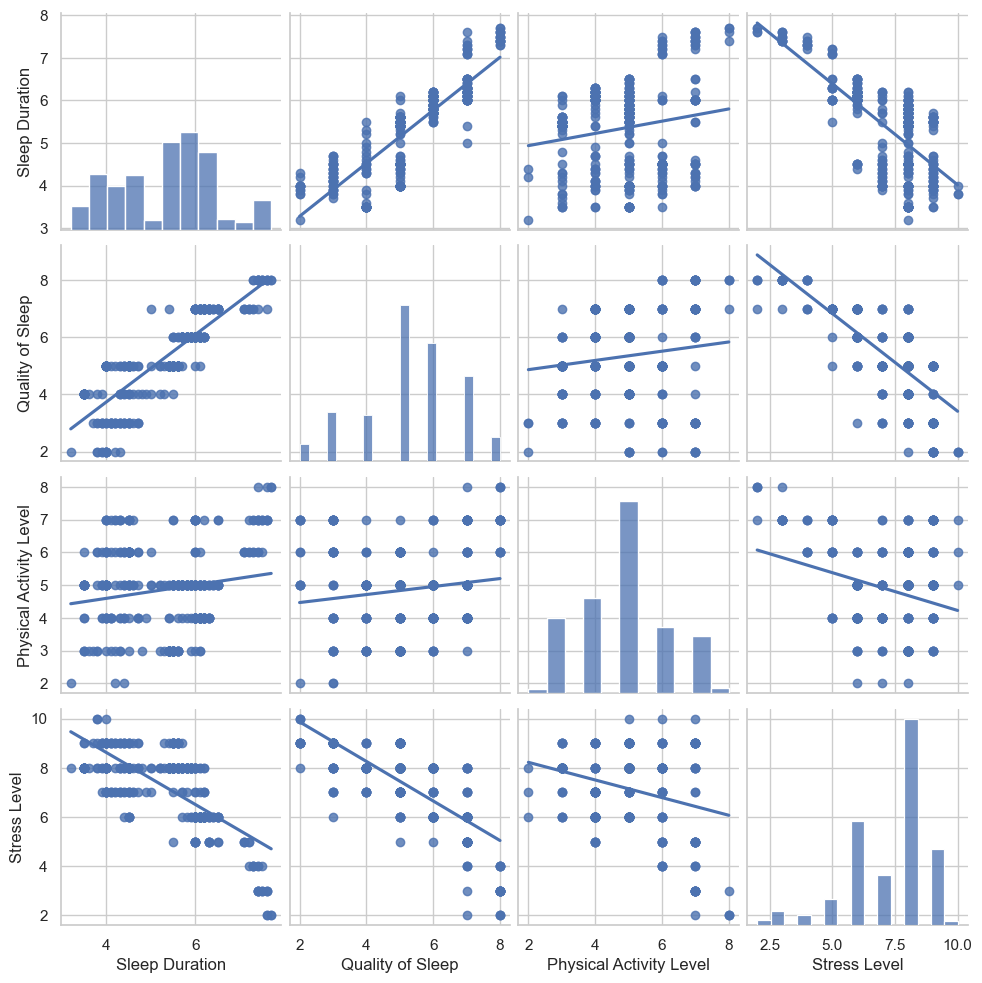

In [18]:
new_data = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")
sns.pairplot(new_data[['Sleep Duration', 'Quality of Sleep', 'Physical Activity Level','Stress Level']], kind="reg", plot_kws={'ci': None})

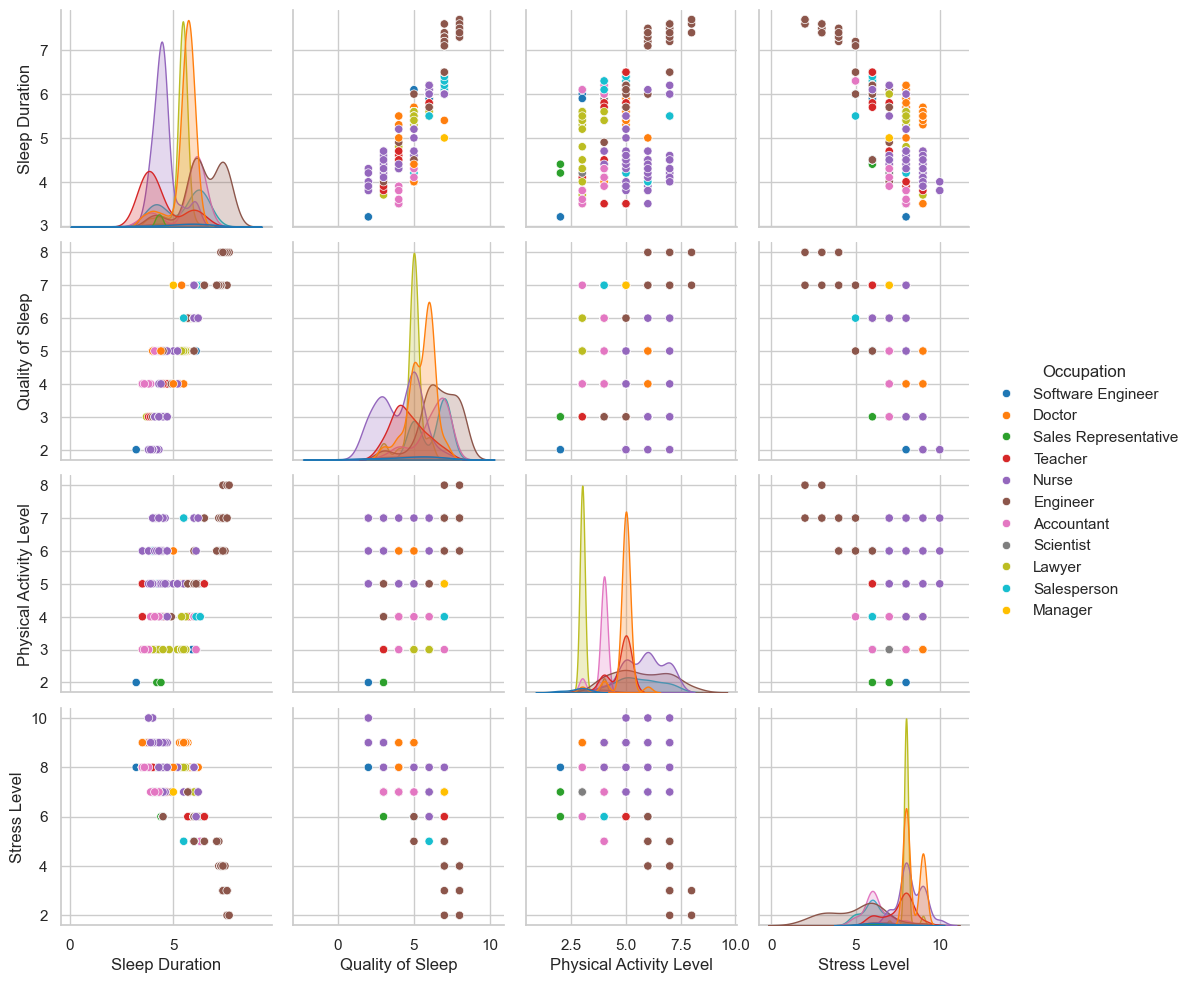

In [19]:
custom_pallete = {
    'Software Engineer': '#1f77b4',
    'Doctor': '#ff7f0e',
    'Sales Representative': '#2ca02c',
    'Teacher': '#d62728',
    'Nurse': '#9467bd',
    'Engineer': '#8c564b',
    'Accountant': '#e377c2',
    'Scientist': '#7f7f7f',
    'Lawyer': '#bcbd22',
    'Salesperson': '#17becf',
    'Manager': '#ffbf00',
}
sns.pairplot(new_data[['Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Occupation']], hue="Occupation", palette=custom_pallete)

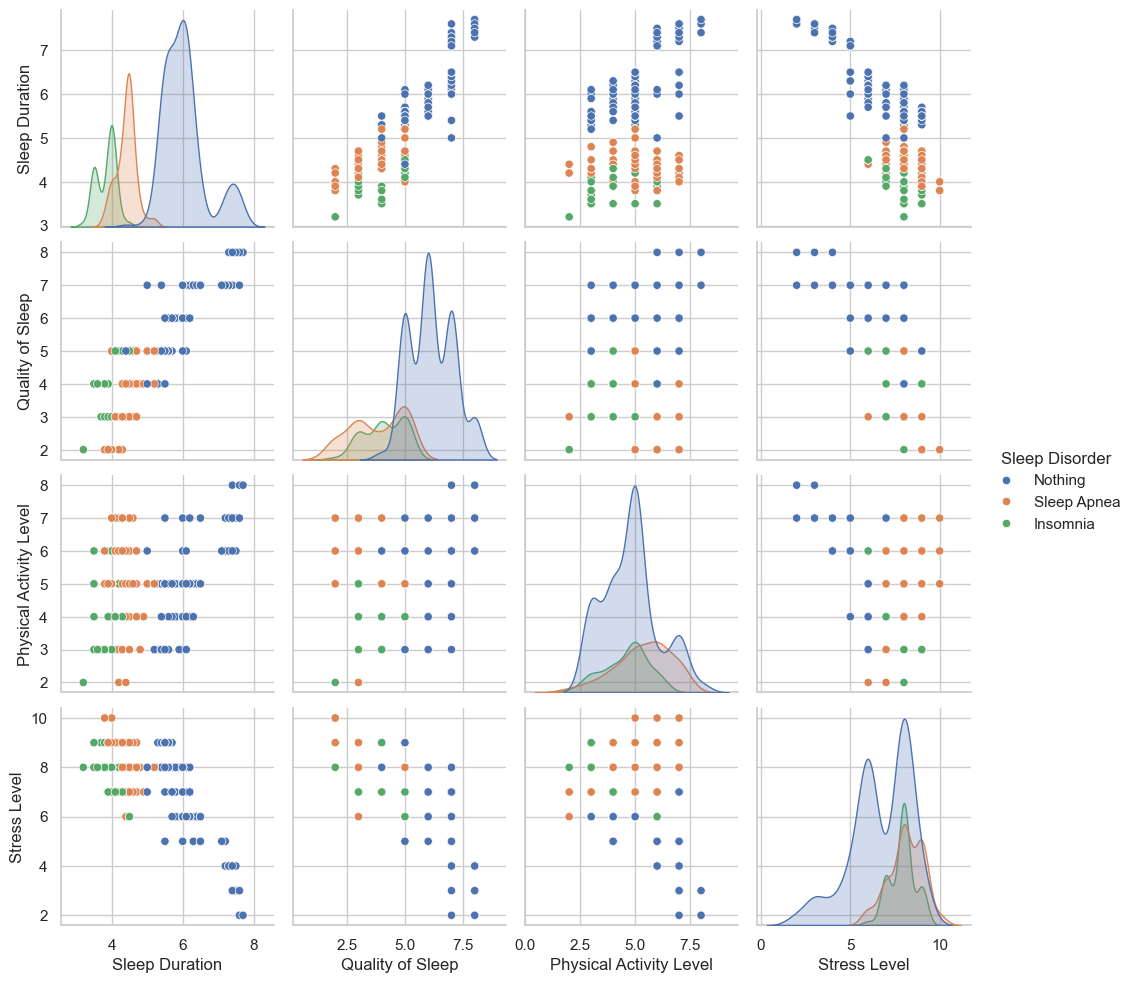

In [20]:
sns.pairplot(new_data[['Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Sleep Disorder']], hue="Sleep Disorder")

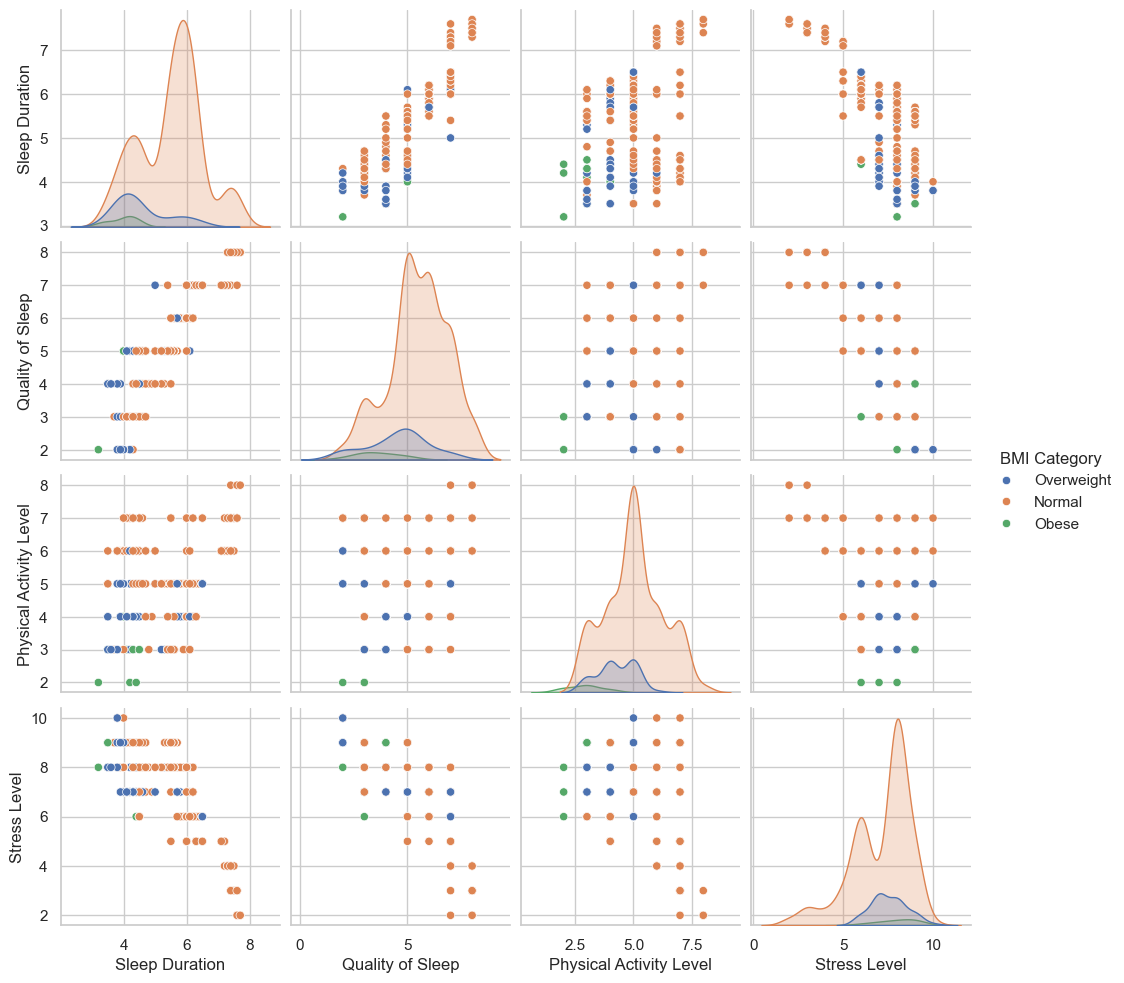

In [21]:
sns.pairplot(new_data[['Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'BMI Category']], hue="BMI Category")